In [ ]:
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis.gensim
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from nltk import FreqDist
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.feature_extraction.text import TfidfTransformer

C:\Users\Raisha Citra C\anaconda\lib\site-packages\nltk\decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


In [2]:
data = pd.read_csv("D:/Raisha/TUGAS AKHIR/csv/dataterbaru.csv", usecols=["sentiment", "text"])
data.head(10)

,text,sentiment
0,acara silaturahmi bareng keluarga besar sambil...,1
1,teknologi maju indonesia maju indonesia maju j...,1
2,bisa bantu jawab jokowi jokowi menang jokowi a...,1
3,bantu subsidi umum bsu beri perintah besar idr...,1
4,dukung tni polri habis rizieq fpi begundal beg...,1
5,adlah pilih jokowi pilpres bahkan timses provi...,1
6,agustinus ulah kibar bendera panjat baliho sor...,1
7,ahy turun langsung medan perintah tegas kalah ...,1
8,ajar pimpin salim dulu bapak persiden nkri har...,1
9,datang masa indonesia importir lobster jokowi,1


In [ ]:
print('Shape : ',data.shape)
data.head()

Shape :  (1200, 2)


,text,sentiment
0,acara silaturahmi bareng keluarga besar sambil...,1
1,teknologi maju indonesia maju indonesia maju j...,1
2,bisa bantu jawab jokowi jokowi menang jokowi a...,1
3,bantu subsidi umum bsu beri perintah besar idr...,1
4,dukung tni polri habis rizieq fpi begundal beg...,1


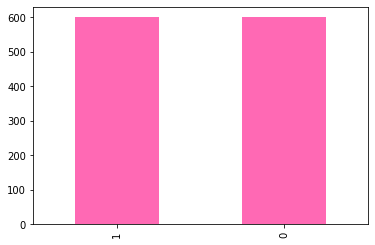

In [4]:
data['sentiment'].value_counts().plot.bar(color = 'hotpink', figsize = (6, 4))

In [5]:
data['sentiment'].value_counts()

1    600
0    600
Name: sentiment, dtype: int64

In [6]:
bow_transformer = CountVectorizer()
print(data['text'].shape)
X=bow_transformer.fit_transform(data['text'])

print (X.toarray())
print('Shape of Sparse Matrix : ',X.shape)
print('Amount of Non-zero accourences: ',X.nnz)

#save the count vectorized to disk
filename1 = 'count_vectorized.pkl'
pickle.dump(bow_transformer, open(filename1, 'wb'))

#TFID Transform
tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

#save the TFID to disk
filename1 ='tfid_transform1.pkl'
pickle.dump(tf_transform, open(filename1, 'wb'))


(1200,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix :  (1200, 3885)
Amount of Non-zero accourences:  17135
(1200, 3885)


In [7]:
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:10] #Naive Method
freq

jokowi       1337
presiden      474
indonesia     473
maju          216
prabowo       124
rakyat        113
corona        108
tidak         106
kpk           106
perintah      104
dtype: int64

In [8]:
tf1 = (data['text'][:]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,casting,2.0
1,ikan,10.0
2,video,12.0
3,lupa,6.0
4,besar,21.0
...,...,...
3880,jagalsampaibatal,1.0
3881,mositidakpercaya,1.0
3882,didengar,1.0
3883,haus,1.0


In [10]:
import numpy as np
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['text'].str.contains(word)])))

tf1

,words,tf,idf
0,casting,2.0,7.090077
1,ikan,10.0,4.525127
2,video,12.0,4.605170
3,lupa,6.0,5.298317
4,besar,21.0,4.145638
...,...,...,...
3880,jagalsampaibatal,1.0,7.090077
3881,mositidakpercaya,1.0,7.090077
3882,didengar,1.0,7.090077
3883,haus,1.0,6.396930


In [11]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,casting,2.0,7.090077,14.180154
1,ikan,10.0,4.525127,45.251275
2,video,12.0,4.605170,55.262042
3,lupa,6.0,5.298317,31.789904
4,besar,21.0,4.145638,87.058395
...,...,...,...,...
3880,jagalsampaibatal,1.0,7.090077,7.090077
3881,mositidakpercaya,1.0,7.090077,7.090077
3882,didengar,1.0,7.090077,7.090077
3883,haus,1.0,6.396930,6.396930


In [16]:
# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], \
                                                    test_size=0.2, random_state=0)

print('Load %d training examples and %d testing examples. \n' %(X_train.shape[0],X_test.shape[0]))

Load 960 training examples and 240 testing examples. 



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=1) #minimum document frequency of 1
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) 

# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)



Number of features : 3439 



MultinomialNB()

In [14]:
import sklearn.metrics as metrics
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [15]:
# Evaluating naive bayes
predictions = mnb.predict(tfidf.transform(X_test))
modelEvaluation(predictions)


Accuracy on validation set: 0.8458

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       130
           1       0.80      0.88      0.84       110

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240


Confusion Matrix : 
 [[106  24]
 [ 13  97]]


# Test Menggunakan Data Uji

In [ ]:
review= "presiden kami kinerjanya tidak buruk"
review_vector = tfidf.transform([review])
mnb.predict(review_vector)

In [ ]:
col_names = ["tweet","sentiment"]
datas = pd.read_csv('D:/Raisha/TUGAS AKHIR/csv/datauji.csv',names=col_names,error_bad_lines=False)
test_datas = datas['tweet'].tolist()
# print(datas.head())
sentiment_datas = datas['sentiment']

#Testing For Add Data in specific column
sentiment_datas[1] = 1
print(sentiment_datas)

In [ ]:
#Global Variable Desine
total_positive = 0
total_negative = 0

In [ ]:
# Sentiment Prediction  from test data
i = 1
for data in test_datas:
    sample = [data]
    sample = tfidf.transform(sample)
    sentiment = mnb.predict(sample)
    sentiment_datas[i] = int(sentiment)
    print(type(sentiment))
    print(data,"Sentiment : ",sentiment)
    i = i+1

In [ ]:
print(datas.shape)
print(datas['sentiment'].tolist())
print(datas['sentiment'].count)

In [ ]:
positive = []
negative = []

for d in datas['sentiment'].tolist():
    
    if d == 0:
        negative.append(0)
    else:
        positive.append(1)
print(len(negative))
print(len(positive))

In [ ]:
#Menampilkan hasil analisis sentimen
import matplotlib.pyplot as plt
slices = [len(positive), len(negative)]
activities = ['Positif','Negatif']
cols = ['brown','pink']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1),
        autopct='%0.2f%%')

plt.title('Implementasi Data Uji')
plt.plot
plt.savefig("C:/xampp/xampp/htdocs/Campus/imagesnaive/graphnaive.png")
plt.show()

# Topic Modelling
## Latent Dirichlet Allocation(LDA)

In [17]:
du = pd.read_csv("D:/Raisha/TUGAS AKHIR/csv/dataterbaru.csv", usecols=["sentiment", "text"])
du.head(10)

,text,sentiment
0,acara silaturahmi bareng keluarga besar sambil...,1
1,teknologi maju indonesia maju indonesia maju j...,1
2,bisa bantu jawab jokowi jokowi menang jokowi a...,1
3,bantu subsidi umum bsu beri perintah besar idr...,1
4,dukung tni polri habis rizieq fpi begundal beg...,1
5,adlah pilih jokowi pilpres bahkan timses provi...,1
6,agustinus ulah kibar bendera panjat baliho sor...,1
7,ahy turun langsung medan perintah tegas kalah ...,1
8,ajar pimpin salim dulu bapak persiden nkri har...,1
9,datang masa indonesia importir lobster jokowi,1


In [18]:
positif = du.loc[du['sentiment'] == 1]

negatif= du.loc[du['sentiment'] == 0]

In [19]:
tokenized = pd.Series(positif['text']).apply(lambda x: x.split())

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
def freq_words(x, terms = 10):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})    
    
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(9,6))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
   

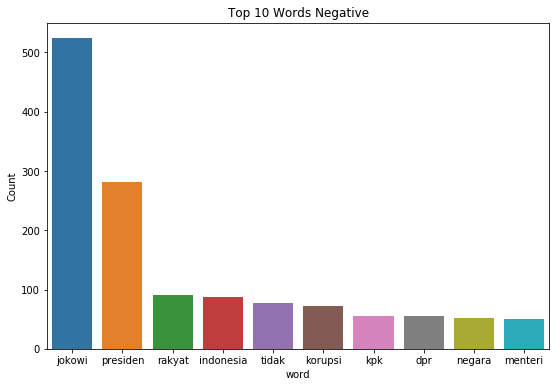

In [21]:
from nltk import FreqDist
freq_words(negatif['text'])
plt.title('Top 10 Words Negative')
plt.savefig("C:/xampp/xampp/htdocs/Campus/imagesnaive/graph_top_naive_negative.png")
plt.show()

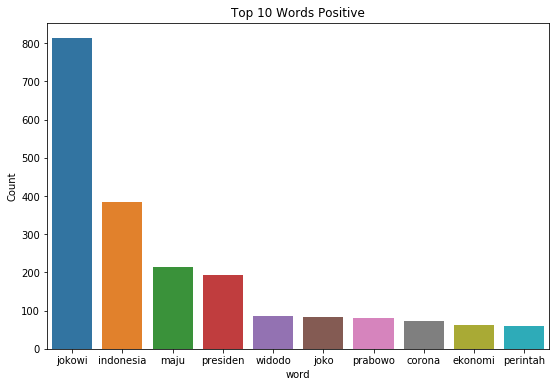

In [22]:
from nltk import FreqDist
freq_words(positif['text'])
plt.title('Top 10 Words Positive')
plt.savefig("C:/xampp/xampp/htdocs/Campus/imagesnaive/graph_top_naive_positive.png")
plt.show()

In [23]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized)

In [24]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized]
print(doc_term_matrix)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(9, 1), (21, 2), (22, 1), (23, 3), (24, 1), (25, 1)], [(9, 3), (21, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(3, 1), (9, 1), (21, 1), (22, 1), (25, 1), (27, 1), (32, 2), (33, 2), (34, 2), (35, 1), (36, 1), (37, 1), (38, 2), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(9, 1), (21, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1)], [(3, 1), (9, 3), (21, 1), (32, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 2), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1)], [(9, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 

In [25]:
import gensim
from gensim import corpora
import pyLDAvis.gensim
LDA = gensim.models.ldamodel.LdaModel
NUM_TOPICS=2
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=NUM_TOPICS,alpha=1,eta=1,iterations=10)

In [26]:
topics = lda_model.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.067*"jokowi" + 0.018*"indonesia" + 0.014*"maju" + 0.010*"presiden" + 0.005*"joko" + 0.005*"widodo" + 0.003*"prabowo" + 0.003*"kerja" + 0.003*"corona" + 0.003*"perintah"')

(1, '0.021*"jokowi" + 0.013*"indonesia" + 0.008*"presiden" + 0.007*"maju" + 0.005*"widodo" + 0.005*"ekonomi" + 0.004*"corona" + 0.004*"joko" + 0.003*"prabowo" + 0.003*"kpk"')

(2, '0.032*"jokowi" + 0.020*"indonesia" + 0.010*"presiden" + 0.009*"maju" + 0.005*"prabowo" + 0.005*"corona" + 0.004*"widodo" + 0.004*"perintah" + 0.003*"edhy" + 0.003*"ekonomi"')

(3, '0.033*"jokowi" + 0.024*"indonesia" + 0.012*"maju" + 0.009*"presiden" + 0.005*"joko" + 0.005*"prabowo" + 0.005*"edhy" + 0.004*"widodo" + 0.004*"menteri" + 0.004*"corona"')



In [27]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = lda_model.show_topic(i, topn = 10)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [ ]:
pd.DataFrame(word_dict)

In [28]:
from gensim.models import CoherenceModel
print('perplexity= ',-lda_model.log_perplexity(doc_term_matrix))

perplexity=  7.390437049701567


In [29]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.006703 -0.000748       1        1  33.694431
3     -0.000115  0.002714       2        1  24.988226
2     -0.000975 -0.001230       3        1  22.762718
1     -0.005613 -0.000735       4        1  18.554630, topic_info=          Term        Freq       Total Category  logprob  loglift
9       jokowi  438.000000  438.000000  Default  30.0000  30.0000
21   indonesia  199.000000  199.000000  Default  29.0000  29.0000
188    ekonomi   33.000000   33.000000  Default  28.0000  28.0000
140     corona   38.000000   38.000000  Default  27.0000  27.0000
128       edhy   31.000000   31.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
535       oleh    3.026519   16.151901   Topic4  -6.4606   0.0098
132    menteri    3.997534   28.516886   Topic4  -6.1823  -0.2804
36        guru    3.049349   16.876749   Topic4  -6.4531  -0.0266
130      kerja    3.815236   30.509426   Topic4  -6.2290  -0.3946
128       edhy    3.739831   31.479988   Topic4  -6.2490  -0.4459

[268 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
244       1  0.320131    aceh
244       2  0.192079    aceh
244       3  0.256105    aceh
244       4  0.192079    aceh
359       1  0.304184   agama
...     ...       ...     ...
935       4  0.246568  wisata
1044      1  0.401063   zaman
1044      2  0.401063   zaman
1044      3  0.401063   zaman
1044      4  0.401063   zaman

[651 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [ ]:
def textPreprocessing(data):
    #Remove Punctuation Logic
    import string
    removePunctuation = [char for char in data if char not in string.punctuation]
    #Join Chars to form sentences
    sentenceWithoutPunctuations = ''.join(removePunctuation)
    words = sentenceWithoutPunctuations.split()
    #StopwordRemoval
    from nltk.corpus import stopwords
    removeStopwords = [word for word in words if word.lower() not in nltk.corpus.stopwords.words('indonesian')]
    
    return removeStopwords

In [ ]:
bow = CountVectorizer().fit(data['text'])

In [ ]:
len(bow.vocabulary_)

In [ ]:
reviews_bow = bow.transform(data['text'])

In [ ]:
tfidfData = TfidfTransformer().fit(reviews_bow)
tfidfDataFinal = tfidfData.transform(reviews_bow)

In [ ]:
tfidfDataFinal.shape

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tfidfDataFinal,data['sentiment'])

In [ ]:
model

In [ ]:
inputData = "buruk"
l1 = textPreprocessing(inputData)
l2 = bow.transform(l1)
l3 = tfidfData.transform(l2)
prediction = model.predict(l3[0])
prediction

In [ ]:
# Using Matplotlib to show distribution of reviews sentiment in the dataset
import matplotlib.pyplot as plt
print(data.sentiment.value_counts())
data['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Reviews Sentiment", size=18)

In [ ]:
data.info()

In [ ]:
X = data['text'].tolist()
Y = data['sentiment']

In [ ]:
# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# SVM
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train_tfidf, y_train)

In [ ]:
# Have a look at the top 10 features with the smallest and largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = clf.coef_[0].argsort()
print('\nTop 10 features with the smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with the largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

In [ ]:
# Evaluating on the validaton set
predictions = clf.predict(tfidf.transform(X_test))
modelEvaluation(predictions)

In [ ]:
import nltk
nltk.download('wordnet')

doc_complete = data["text"].tolist()
doc_clean = [textPreprocessing(doc) for doc in doc_complete]

In [ ]:
import gensim
from gensim import corpora

In [ ]:
dictionary = corpora.Dictionary()
print(dictionary)

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_complete]
doc_term_matrix

In [ ]:
from gensim.models import LdaModel

In [ ]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)

In [ ]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

In [ ]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [ ]:
pd.DataFrame(word_dict)

In [ ]:
data['sentiment'].value_counts().plot.bar(color = 'hotpink', figsize = (6, 4))

In [ ]:
data['sentiment'].value_counts()

In [ ]:
#Tokenizing and change text to sequence
from keras.preprocessing.sequence import pad_sequences

max_features = 2000
MAX_SEQUENCE_LENGTH = 40

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index
print("Found %s unique tokens" % len(word_index),'\n')
print("Index: "+str(tokenizer.word_index),"\n")

X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating="post")
X[:2]

In [ ]:
#Vctorizer = CountVectorizer()
#X =vectorizer.fit_transform(df['tweet'])

bow_transformer = CountVectorizer()
print(data['text'].shape)
X=bow_transformer.fit_transform(data['text'])

print (X.toarray())
print('Shape of Sparse Matrix : ',X.shape)
print('Amount of Non-zero accourences: ',X.nnz)

#save the count vectorized to disk
filename1 = 'count_vectorized.pkl'
pickle.dump(bow_transformer, open(filename1, 'wb'))

#TFID Transform
tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

#save the TFID to disk
filename1 ='tfid_transform1.pkl'
pickle.dump(tf_transform, open(filename1, 'wb'))


In [ ]:
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:10] #Naive Method
freq

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

TextBlob(data['text'][0]).ngrams(2)

In [ ]:
tf1 = (data['text'][:]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

In [ ]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['text'].str.contains(word)])))

tf1

In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',ngram_range=(1,2))
train_vect = tfidf.fit_transform(data['text'])

train_vect

In [ ]:
#Split dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0, stratify = Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
#Classifier data
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
accuracy = (tn + tp) / (tn + fp + fn + tp)
print(accuracy)

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred, average=None)

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred, average=None)

In [ ]:
# F1 score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average=None)

In [ ]:
#Classifier data
#nb = MultinomialNB()
#nb.fit(X_train, Y_train)
#preds = nb.predict(X_test)

In [ ]:
# A function to plot and print result
def printResult(y_pred, y_prob):
    acc = accuracy_score(test_data["sentiment"], Y_pred)
    # Result
    print("Accuracy: {:.2f}".format(acc*100),end='\n\n')
    cm = confusion_matrix(test_data["sentiment"],Y_pred)
    print('Confusion Matrix:\n', cm)
    print(classification_report(test_data["sentiment"],Y_pred))

    # Plot
    fpr, tpr, thresholds = roc_curve(test_data["sentiment"], y_prob)
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % accuracy = (tn + tp) / (tn + fp + fn + tp)c_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='lower right')

In [ ]:
# Training 
X.fit(bow_training_features, train_data["sentiment"])

# Evaluation
y_pred_bow_svm = X.predict(bow_test_features)
y_prob_bow_svm = X.decision_function(bow_test_features)

In [ ]:
#Evaluasi Performansi
from sklearn.metrics import confusion_matrix,classification_report

target_names = ['class negatif', 'class positif']
print("confusion matrix",confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=target_names))

In [ ]:
from io import StringIO
classification = classification_report(Y_test, preds)
s = StringIO(classification)
with open ('classification.csv', 'w') as f:
    for line in s:
        f.write(line)

In [ ]:
print (accuracy_score(Y_test, Y_pred))

In [ ]:
accuracy= accuracy_score(Y_test, preds)
a = np.asarray([accuracy])
np.savetxt("accuracy.csv", a,delimiter=",", fmt='%s')

In [ ]:
Final = data [['tweet', 'sentiment']]
print(Final)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

In [ ]:
#Final= Final.rename(columns={'tanggal': 'Tanggal', })

In [ ]:
Final.to_csv('hasil_analysis.csv')

In [ ]:
#Split dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, random_state = 0, stratify = Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
#Proses Training


#batch_size = 32
#history = model.fit(X_train, Y_train, nb_epoch=50, validation_data=(X_test, Y_test), verbose = 1)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

In [ ]:
#save the model to disk
filename='model_analisis.pkl'
result= loaded_model.score(X_test, Y_test)
print(result)

In [ ]:
loaded_model.predict(X_test)